## HOTEL BOOKING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
# import matplotlib as plt
import seaborn as sns
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

## PROBLEM STATEMENT

## THE PURPOSE OF THIS MODEL IS TO PREDICT WHETHER A CUSTOMER WILL CANCEL THE BOOKING OR NOT
## THE MODEL CAN BE BENIFICIAL FOR THE HOTEL TO PREDICT WHETHER THE CUSTOMER WILL CANCEL THE BOOKING OR NOT 
## IF THE CUSTOMER DOES NOT CANCEL THEN THEY CAN MAKE FURTHER ARRANGEMNETS LIKE FOOD AND ROOM ARRANGMENTS ETC

#### is_canceled = Value indicating if the booking was canceled (1) or not (0)
#### lead_time =Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
#### stays_in_weekend_nights= Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
#### stays_in_week_nights= Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
#### adults= Number of adults
#### meal= Undefined/SC = no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
#### is_repeated_guest= Value indicating if the booking name was from a repeated guest (1) or not (0) 
#### previous_cancellations =  Number of previous bookings that were cancelled by the customer prior to the current booking
#### previous_bookings_not_canceled=  Number of previous bookings not cancelled by the customer prior to the current booking 
#### reserved_room_type = Code of room type reserved. Code is presented instead of designation for anonymity reasons
#### assigned_room_type=  Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request
#### deposit_type = Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay 
#### booking_changes = Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
#### agent = ID of the travel agency that made the booking
#### company = ID of the company/entity that made the booking or responsible for paying the booking
#### days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer 
#### customer_type: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking 
#### required_car_parking_spaces: Number of car parking spaces required by the customer 
#### adr = Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
#### total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor) 
#### reservation_status: Reservation last status, assuming one of three categories: Canceled – booking was cancelled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why 
#### reservation_status_date: Date at which the last status was set. This variable can be used in conjunction with the Reservation Status to understand when was the booking cancelled or when did the customer checked-out of the hote    

In [2]:
df=pd.read_csv("C:\\Users\\sharath\\OneDrive\\CHAYA_IMP\\CAPSTONE_ML\\hotel_bookings.csv")

In [3]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
df.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,3/7/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,3/7/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,6/5/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,22/4/2015


In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df["reservation_status_date"]=pd.to_datetime(df["reservation_status_date"])

In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df.drop(["agent","company"],axis=1,inplace=True)

In [10]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
df.shape

(119390, 30)

# since we are checking if the customer will cancel the booking or not we will drop few columns like agent and company

# we observe that column "children" has few null values lets treat that

In [12]:
df["children"].fillna(0,inplace=True)

In [13]:
df.dropna(inplace=True)

## it is better to fill the null value with 0 instaed of mean or median as it is children column

In [14]:
df.isnull().sum() 

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# there are no null values

In [15]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000
mean,0.371373,104.308027,2016.157617,27.166726,15.800567,0.928891,2.502136,1.858404,0.104203,0.007948,0.032010,0.087139,0.131629,0.221174,2.330676,102.000808,0.061883,0.571706
std,0.483174,106.903127,0.707479,13.589774,8.780371,0.996211,1.900165,0.578576,0.399166,0.097379,0.176026,0.845855,1.484647,0.652775,17.630161,50.487004,0.244168,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<AxesSubplot:xlabel='adr'>

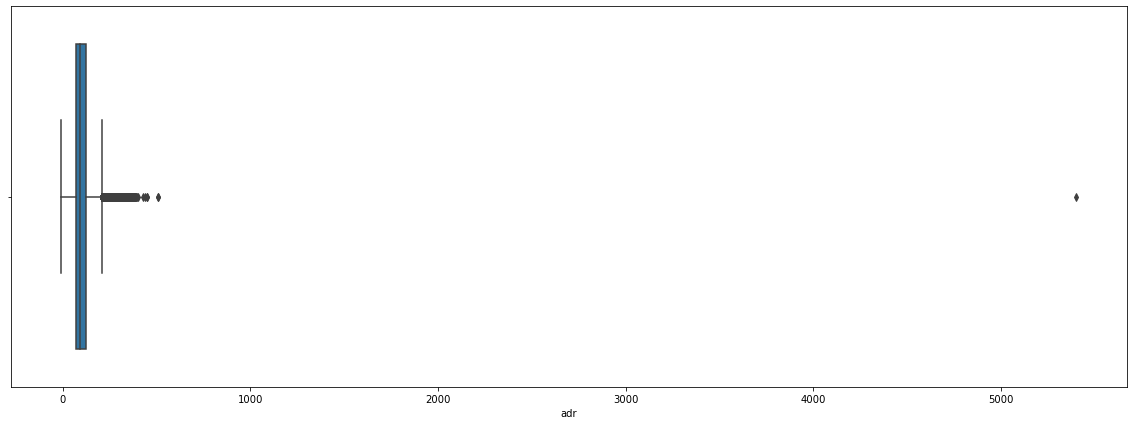

In [16]:
plt.figure(figsize=(20,7))
sns.boxplot(df["adr"],data=df)

# we observe there are outliers in adr column

### we can remove the outlier

In [17]:
df=df[df["adr"]<5000]

In [18]:
df["adr"].describe()

count    118901.000000
mean        101.956250
std          48.092478
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

<AxesSubplot:xlabel='adr'>

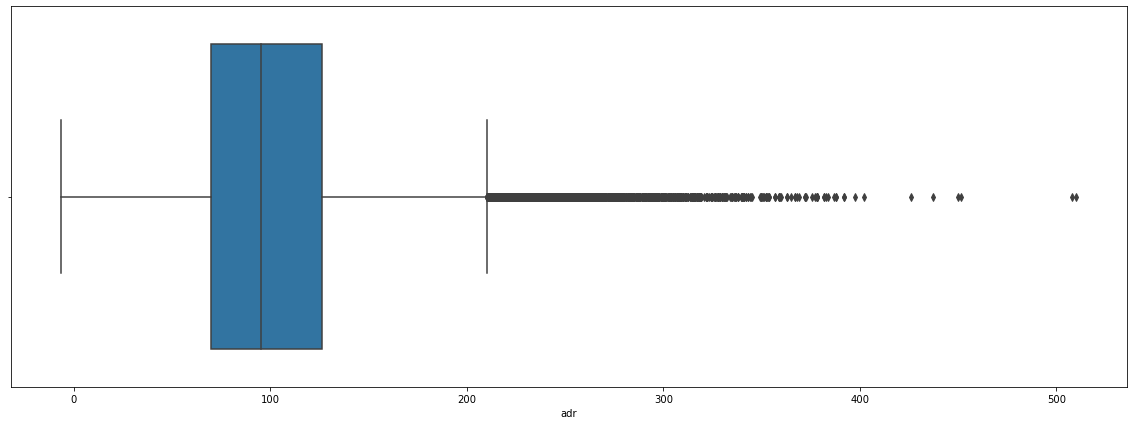

In [19]:
plt.figure(figsize=(20,7))
sns.boxplot(df["adr"],data=df)

## the major outlier which was more than 5000 is removed

# the percentage of cancellation

In [20]:
cancelled_percentage=df["is_canceled"].value_counts(normalize=True)
cancelled_percentage

0    0.628632
1    0.371368
Name: is_canceled, dtype: float64

### 62% doesn't cancel the booking where as 37% tend to cancel the booking

### we need to work on the 37% who tend to cancel the booking

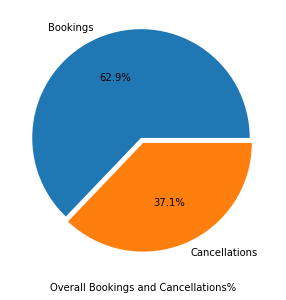

In [21]:
explode = (0.05, 0)
plt.figure(figsize=(14, 5))
ax=plt.pie(data=df, x=df.is_canceled.value_counts().values ,labels = ['Bookings', 'Cancellations'],autopct='%.1f%%', explode=explode)
plt.xlabel('Overall Bookings and Cancellations%')
plt.show()

In [22]:
df.hotel.value_counts()

City Hotel      79305
Resort Hotel    39596
Name: hotel, dtype: int64

In [23]:
df_cancel=pd.crosstab(df['hotel'], df['is_canceled']).T
df_cancel

hotel,City Hotel,Resort Hotel
is_canceled,,
0,46226,28519
1,33079,11077


### we can see 33102 have cancelled in city hotel
### 11122 have cancelled in resort hotel
# CITY HOTEL HAS MORE NUMBER OF CANCELLATIONS

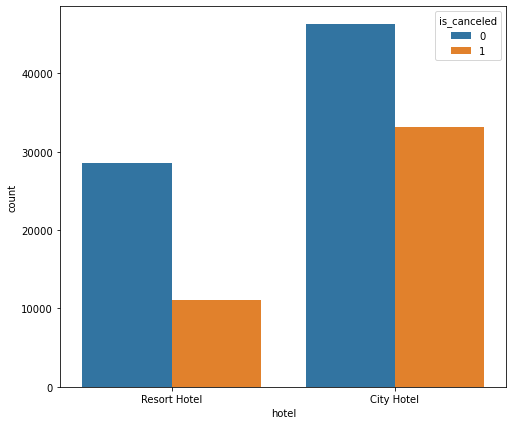

In [24]:
plt.figure(figsize=(8,7))
sns.countplot(x="hotel",hue="is_canceled",data=df)
plt.title="reservation status in both the hotels"
plt.show()

# percentage of cancellation in resort hotel

In [25]:
resort_hotel=df[df["hotel"]== "Resort Hotel"]
resort_hotel["is_canceled"].value_counts(normalize=False)

0    28519
1    11077
Name: is_canceled, dtype: int64

# percentage of cancellation in city hotel

In [26]:
city_hotel=df[df["hotel"]== "City Hotel"]
city_hotel["is_canceled"].value_counts(normalize=True)

0    0.582889
1    0.417111
Name: is_canceled, dtype: float64

In [27]:
city_hotel=df[df["hotel"]== "Resort Hotel"]
city_hotel["is_canceled"].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

##### we observe that there is 41% cancellation which is a major isssue

# check if the price is effecting the cancellation

In [28]:
resort_hotel=resort_hotel.groupby("reservation_status_date")[["adr"]].mean()
city_hotel=city_hotel.groupby("reservation_status_date")[["adr"]].mean()

In [29]:
resort_hotel

,adr
reservation_status_date,
2014-11-18,0.000000
2015-01-01,61.966667
2015-01-05,115.363333
2015-01-06,133.677143
2015-01-07,82.485455
...,...
2017-12-05,103.287534
2017-12-06,159.808929
2017-12-07,160.306275


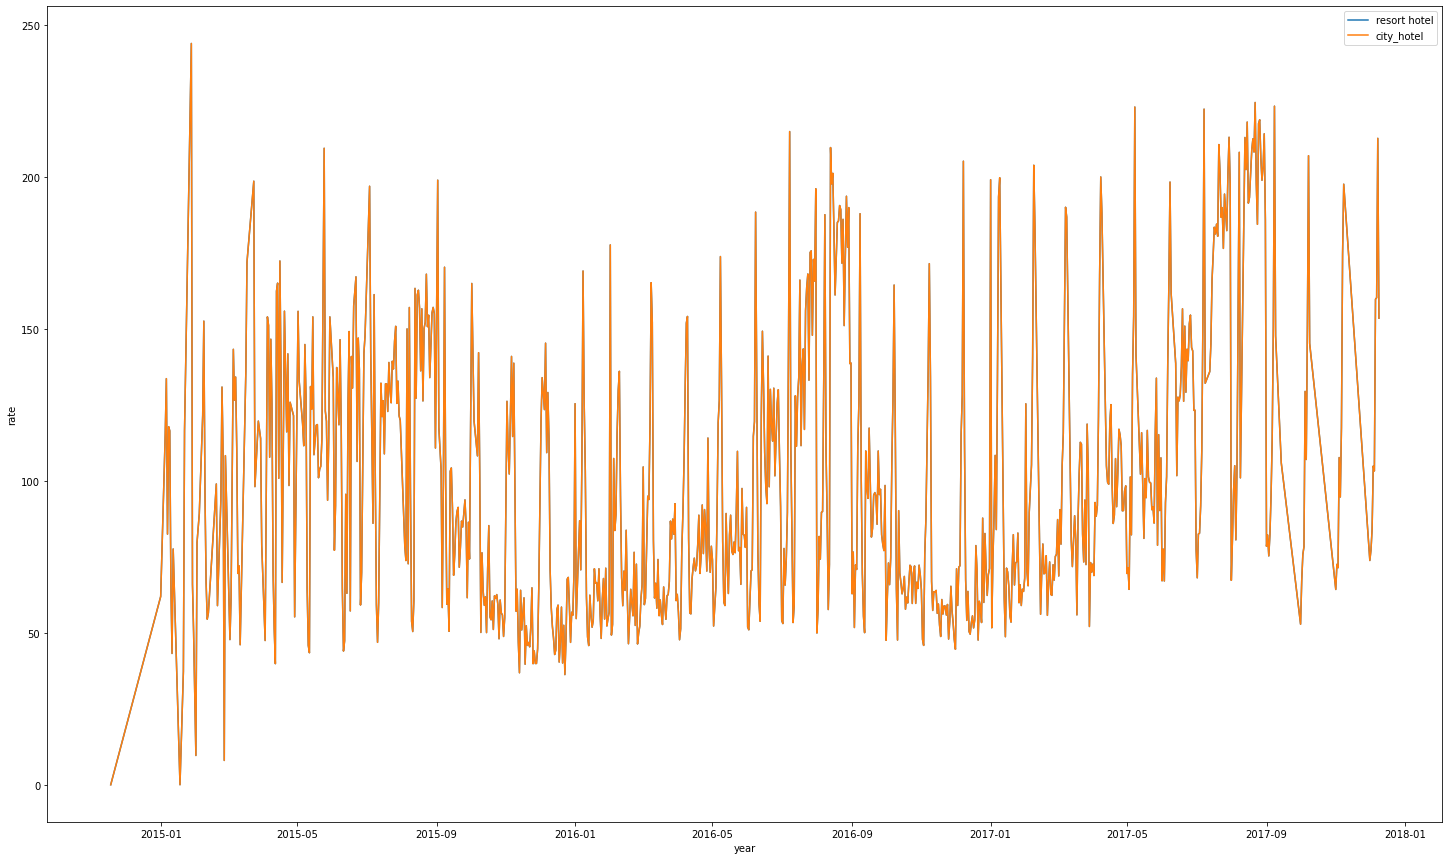

In [30]:
plt.figure(figsize=(25,15))
plt.plot(resort_hotel.index, resort_hotel["adr"],label="resort hotel")
plt.plot(city_hotel.index, city_hotel["adr"],label="city_hotel")
# plt.title('avg daily rate in both the hotels')
plt.xlabel("year")
plt.ylabel("rate")
plt.legend()
plt.show()

### 2016-2017 there is a uniform data,the orange line is in the middle
### the rate is varying in resort hotel it means the rate goes  slightly higher during a particular time

### the price is higher in the resort hotel compared to city hotel

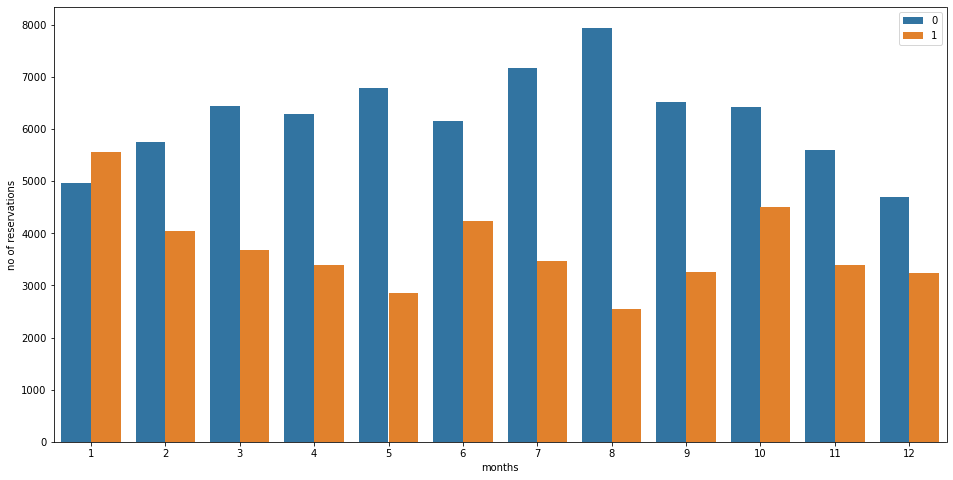

In [31]:
df["month"]=df["reservation_status_date"].dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x="month",hue="is_canceled",data=df)
plt.xlabel("months")
plt.ylabel("no of reservations")
plt.legend()
plt.show()

1. january month has the most cancellations
2. august month has the least cancellations
------------------------------------------
1. august month has the most no of bookings
2. december month the least no of bookings

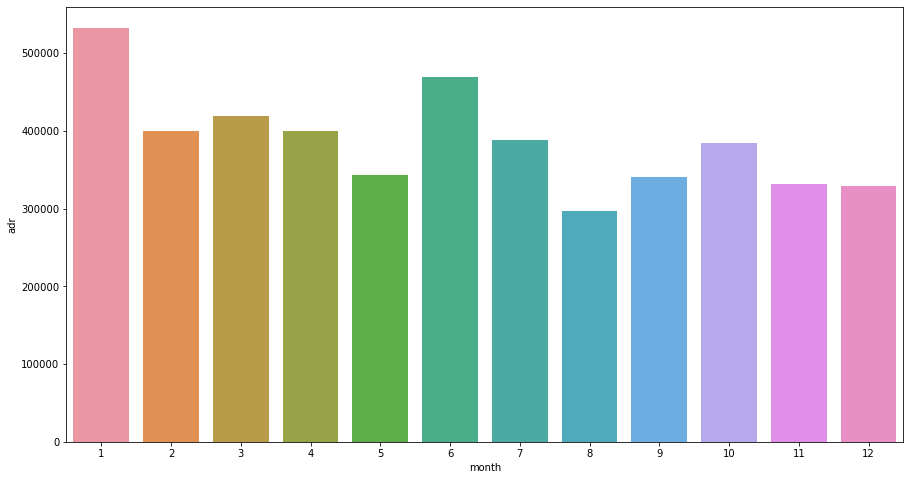

In [32]:
plt.figure(figsize=(15,8))
sns.barplot("month","adr",data=df[df["is_canceled"]==1].groupby("month")[["adr"]].sum().reset_index())
plt.show()

### the rate during the month of august is least compared to other months hence the cancellation in the month of august is low

### the rate during the month of january is highest compared to other months hence the cancellation in the month of january is high


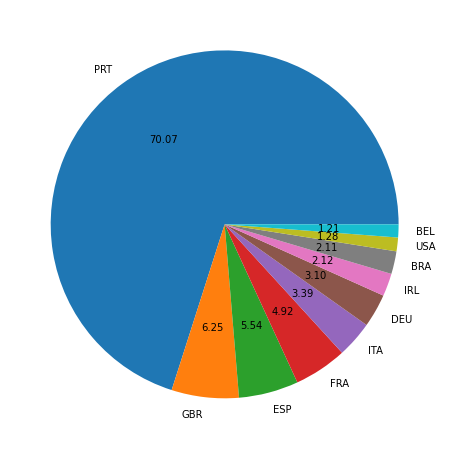

In [33]:
canceled_data = df[df["is_canceled"]==1]
top_10_countries=canceled_data["country"].value_counts()[:10]
plt.figure(figsize=(10,8))
plt.pie(top_10_countries,autopct="%.2f",labels=top_10_countries.index)
plt.show()

### PRT - portugal country does the most cancellations

In [34]:
top_10_countries

PRT    27518
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: country, dtype: int64

In [35]:
df.market_segment.value_counts()

Online TA        56403
Offline TA/TO    24159
Groups           19806
Direct           12449
Corporate         5111
Complementary      734
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [36]:
df.market_segment.value_counts(normalize=True)

Online TA        0.474369
Offline TA/TO    0.203186
Groups           0.166576
Direct           0.104701
Corporate        0.042985
Complementary    0.006173
Aviation         0.001993
Undefined        0.000017
Name: market_segment, dtype: float64

1. most of the customers are making the reservations through online 
2. 20% of the customers are making the reservations offline

In [37]:
cancelled_df_adr=canceled_data.groupby("reservation_status_date")[["adr"]].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values("reservation_status_date",inplace=True)

In [38]:
not_canceled_data =df[df["is_canceled"]==0]

In [39]:
not_cancelled_df_adr=not_canceled_data.groupby("reservation_status_date")[["adr"]].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values("reservation_status_date",inplace=True)

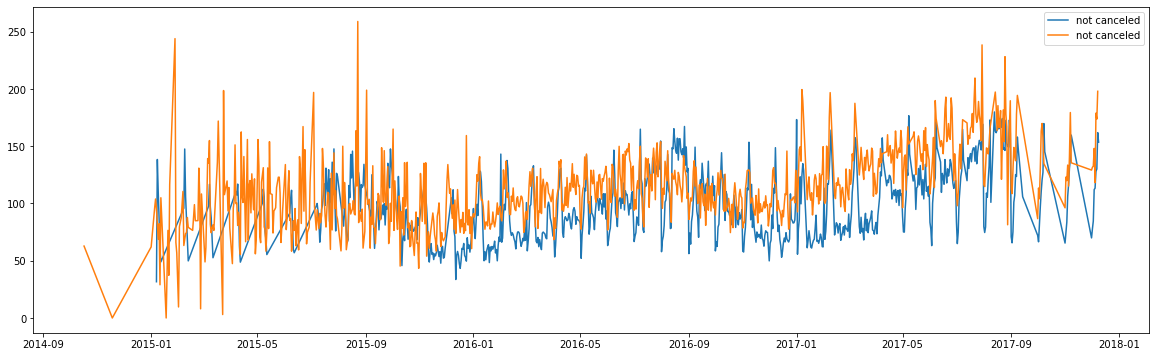

In [40]:
plt.figure(figsize=(20,6))
plt.plot(not_cancelled_df_adr["reservation_status_date"],not_cancelled_df_adr["adr"],label="not canceled")
plt.plot(cancelled_df_adr["reservation_status_date"],cancelled_df_adr["adr"],label="not canceled")
plt.legend()
plt.show()

1. there is less data in the yaer 2015 and 2017

In [41]:
cancelled_df_adr1=cancelled_df_adr[(cancelled_df_adr["reservation_status_date"]>"2016") &(cancelled_df_adr["reservation_status_date"]<"2017-09")]
                                  
not_cancelled_df_adr1=not_cancelled_df_adr[(not_cancelled_df_adr["reservation_status_date"]>"2016") & (not_cancelled_df_adr["reservation_status_date"]<"2017-09")]
                               

# filtered data of only jan 2016 to sep 2017

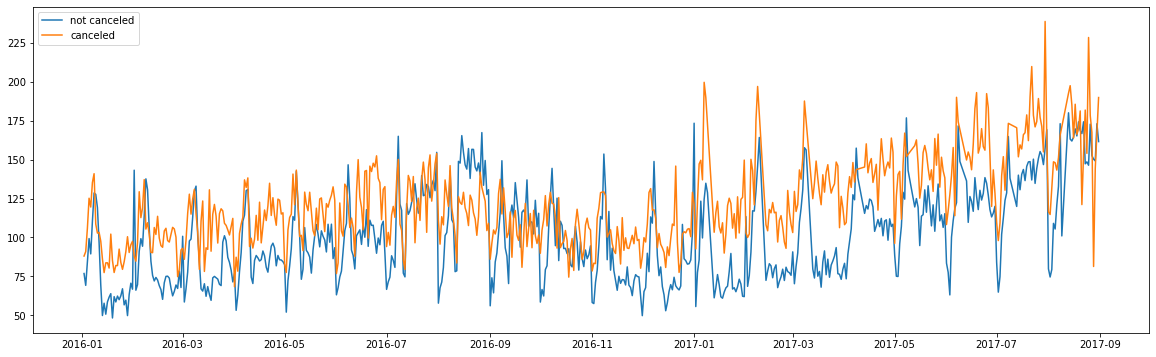

In [42]:
plt.figure(figsize=(20,6))
plt.plot(not_cancelled_df_adr1["reservation_status_date"],not_cancelled_df_adr1["adr"],label="not canceled")
plt.plot(cancelled_df_adr1["reservation_status_date"],cancelled_df_adr1["adr"],label="canceled")
plt.legend()
plt.show()

# we get to know that average daily rate is the one that is mostly influencing the cancellations

**1)we can see that most bookings happen in june and july in weekends hence Most of bookings are in summer months. So, we can target that period**

**2)we can see that most bookings for resort hotel happen during june month in week days and for city hotel it happens during december month**

**3)city hotel has most cancellations...hence they need to work on various factors like food,maintenance**

**4) we can see Most customers prefered City Hotel maybe due to cheaper rates or better services. Resort hotel seems to be expensive, if not they need to work on its maintenance.**

**5)the count of cancellation of booking by the loyal customers is less when compared to others that cancel the booking**

**6)Repeated guest makes more deposits, having less numbers in non-refundable amount and refundable amount which shows the trustful bidirectional relationship between customers/guests and hotels.**

**7)Room type A has more no of cancellation in both city and resort hotel so both the hotel types need to work on it**


In [43]:
df.is_canceled.unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='adr', ylabel='lead_time'>

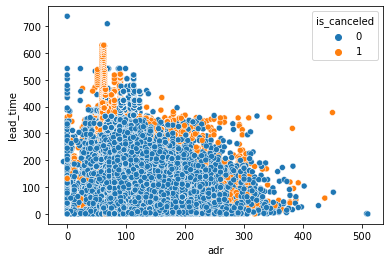

In [44]:
sns.scatterplot(x = "adr", y = "lead_time", hue="is_canceled",data=df)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118901 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118901 non-null  object        
 1   is_canceled                     118901 non-null  int64         
 2   lead_time                       118901 non-null  int64         
 3   arrival_date_year               118901 non-null  int64         
 4   arrival_date_month              118901 non-null  object        
 5   arrival_date_week_number        118901 non-null  int64         
 6   arrival_date_day_of_month       118901 non-null  int64         
 7   stays_in_weekend_nights         118901 non-null  int64         
 8   stays_in_week_nights            118901 non-null  int64         
 9   adults                          118901 non-null  int64         
 10  children                        118901 non-null  float64

In [46]:
df_hotel=pd.get_dummies(df["hotel"],drop_first=True,prefix="hotel")

In [47]:
df=pd.concat([df,df_hotel],axis=1)

In [48]:
df = pd.get_dummies(df,columns=['arrival_date_month','meal','country','market_segment','distribution_channel',\
'reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status']\
,drop_first=False,prefix=['arrival_date_month','meal','country','market_segment','distribution_channel',\
'reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status'])

In [49]:
df_hotel=pd.get_dummies(df["hotel"],drop_first=False,prefix="hotel")

In [50]:
df=pd.concat([df,df_hotel],axis=1)

In [51]:
df.drop(["hotel"],axis=1,inplace=True)

In [52]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,hotel_City Hotel,hotel_Resort Hotel
0,0,342,2015,27,1,0,0,2,0.0,0,...,0,0,0,1,0,0,1,0,0,1
1,0,737,2015,27,1,0,0,2,0.0,0,...,0,0,0,1,0,0,1,0,0,1
2,0,7,2015,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,1,0,0,1
3,0,13,2015,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,1,0,0,1
4,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,...,0,0,0,1,0,0,1,0,1,0
119386,0,102,2017,35,31,2,5,3,0.0,0,...,0,0,0,1,0,0,1,0,1,0
119387,0,34,2017,35,31,2,5,2,0.0,0,...,0,0,0,1,0,0,1,0,1,0
119388,0,109,2017,35,31,2,5,2,0.0,0,...,0,0,0,1,0,0,1,0,1,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118901 entries, 0 to 119389
Columns: 262 entries, is_canceled to hotel_Resort Hotel
dtypes: datetime64[ns](1), float64(2), int64(17), uint8(242)
memory usage: 50.5 MB


In [54]:
df.drop(["reservation_status_date"],axis=1,inplace=True)

# BUILDING THE MODEL

In [55]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver="saga")

In [56]:
X= df.iloc[:,df.columns !="is_canceled"]
y = df.iloc[:,df.columns == "is_canceled"]

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [58]:
model = classifier.fit(X_train, y_train.squeeze())

In [59]:
y_pred_train = model.predict(X_train)

In [60]:
y_pred_test = model.predict(X_test)

In [61]:
model.score(X_test,y_test)

0.9142440638053321

In [62]:
model.score(X_train,y_train)

0.9154151147422804

In [63]:
y_pred = classifier.predict(X)

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_test,y_test)
cm

array([[22115,  2846],
       [  213, 10497]], dtype=int64)

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     24961
           1       0.79      0.98      0.87     10710

    accuracy                           0.91     35671
   macro avg       0.89      0.93      0.90     35671
weighted avg       0.93      0.91      0.92     35671



In [66]:
 from sklearn.metrics import roc_curve,auc,roc_auc_score

In [67]:
y_pred_prob=model.predict_proba(X)

In [68]:
fpr,tpr,thresholds=roc_curve(df["is_canceled"],y_pred_prob[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.990986086092479


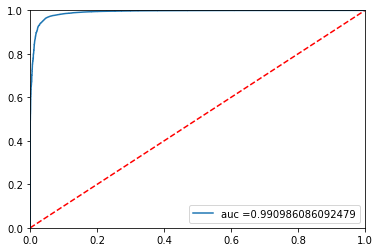

In [69]:
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr,tpr,label= "auc =" +str(roc_auc))
plt.legend(loc=4)
plt.show()